In [5]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision as tv
import numpy as np

关于CIFAR10数据集的详解请看这篇[Blog](https://lry89757.github.io/2021/08/06/cifar10-shu-ju-ji-ji-du-qu/) 以及[官网描述](https://www.cs.toronto.edu/~kriz/cifar.html)

In [6]:
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()
print(t.__version__)

1.8.1+cpu


In [33]:
import time

In [7]:
class LeNet(nn.Module):
    
    def __init__(self) -> None:
        super(LeNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

lenet = LeNet()
print(lenet)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
for name, param in lenet.named_parameters():
    print(name, ":", param.size())

conv1.weight : torch.Size([6, 3, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [9]:
tes = t.randn(8, 3, 32, 32)
out = lenet(tes)
print(out)

tensor([[ 0.0509,  0.0875, -0.1016,  0.0291,  0.1713, -0.0242,  0.0320, -0.0258,
          0.0717, -0.1116],
        [ 0.0319,  0.0958, -0.1055,  0.0236,  0.1785, -0.0331,  0.0217, -0.0193,
          0.0597, -0.1240],
        [ 0.0441,  0.1145, -0.1004,  0.0265,  0.1553, -0.0419,  0.0367, -0.0186,
          0.0581, -0.0937],
        [ 0.0287,  0.1030, -0.0976, -0.0081,  0.1621, -0.0276,  0.0377, -0.0169,
          0.0775, -0.1070],
        [ 0.0421,  0.1273, -0.0846,  0.0229,  0.1900, -0.0396,  0.0397, -0.0266,
          0.0661, -0.0981],
        [ 0.0345,  0.1296, -0.1281,  0.0054,  0.1713, -0.0199,  0.0287, -0.0092,
          0.0851, -0.1343],
        [ 0.0423,  0.1046, -0.1125,  0.0083,  0.1761, -0.0266,  0.0155, -0.0077,
          0.0689, -0.1264],
        [ 0.0474,  0.1118, -0.1055,  0.0262,  0.1548, -0.0320,  0.0355, -0.0341,
          0.0474, -0.1084]], grad_fn=<AddmmBackward>)


In [10]:
lenet.zero_grad()
target = t.randn(8, 10)
criterion = nn.MSELoss()
loss = criterion(out, target)
loss.backward()
print(lenet.conv1.bias.grad)

tensor([-0.0048,  0.0003,  0.0027, -0.0028,  0.0002,  0.0058])


In [11]:
optimizer = optim.SGD(lenet.parameters(), lr=0.01)

optimizer.zero_grad()
output = lenet(tes)
loss = criterion(output, target)
loss.backward()
print(lenet.conv1.bias)
optimizer.step()
print(lenet.conv1.bias)

Parameter containing:
tensor([ 0.0823, -0.0981,  0.0537,  0.0455,  0.0105, -0.1006],
       requires_grad=True)
Parameter containing:
tensor([ 0.0824, -0.0981,  0.0536,  0.0456,  0.0105, -0.1006],
       requires_grad=True)


首先是

In [12]:
# 数据预处理，相当于提前定义了怎么处理数据：
# 因为读入的数据为numpy格式，所以我们要先将其转换为tensor格式，
# 然后对其进行归一化，有三个通道需要归一化，而第一个为均值，第二个为标准差
transform = transforms.Compose([
    transforms.ToTensor(), # 转为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# 训练集
trainset = tv.datasets.CIFAR10(
    root='/pytorch/Data/',
    train=True,
    download=False,
    transform=transform
)

# 迭代器
trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# 测试集
testset = tv.datasets.CIFAR10(
    root='/pytorch/Data/',
    train=False,
    download=False,
    transform=transform
)

# 迭代器
testloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。

ship


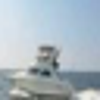

In [13]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

In [14]:
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

ship       ship       ship       car


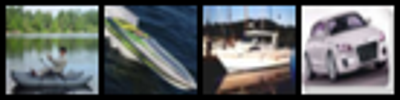

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('       '.join(classes[labels]))
show(tv.utils.make_grid((images + 1) / 2)).resize((400, 100))

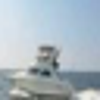

In [16]:
show(((data+1)/2)).resize((100, 100))

## 数据处理部分

In [17]:
# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(), # 转为Tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# 读取训练集
trainset = tv.datasets.CIFAR10(
    root='/pytorch/Data',
    download=False,
    train=True,
    transform=transform
)

# about DataLoader:
# https://www.programcreek.com/python/example/100891/torch.utils.data.DataLoader
# https://blog.csdn.net/weixin_43914889/article/details/104677675?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522162830497416780269880390%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=162830497416780269880390&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-2-104677675.first_rank_v2_pc_rank_v29&utm_term=torch.utils.data.DataLoader&spm=1018.2226.3001.4187
trainloader = t.utils.data.DataLoader(
    trainset,
    shuffle=True,
    batch_size=4,
    num_workers=2     # 好像指代的是线程数，我们最多可以设置为8.
)


# 读取测试集
testset = tv.datasets.CIFAR10(
    root='/pytorch/Data',
    download=False,
    train=False,
    transform=transform
)

testloader = t.utils.data.DataLoader(
    testset,
    shuffle=True,
    batch_size=4,
    num_workers=2
)

In [18]:
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

plane


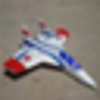

In [19]:
img, label = trainset[30]
print(classes[label])
show((img+1)/2).resize((100, 100))  # 不要矩阵是normalized， 我们应该先将其还原

cat     ship     plane     car


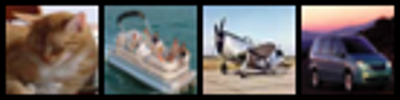

In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print('     '.join(classes[labels]))
show(tv.utils.make_grid((images + 1) / 2)).resize((400, 100))

In [21]:
print(img.size())

torch.Size([3, 32, 32])


In [22]:
print(lenet(img.view(1, 3, 32, 32)))

tensor([[ 0.0462,  0.0814, -0.0883,  0.0105,  0.1242, -0.0399,  0.0149, -0.0062,
          0.0520, -0.0898]], grad_fn=<AddmmBackward>)


In [23]:
lenet.zero_grad()

In [24]:
lenet.conv1.bias.grad

tensor([0., 0., 0., 0., 0., 0.])

In [25]:
# 误差
criterion = nn.CrossEntropyLoss()   # 采用交叉熵
# 优化器
optimizer = optim.SGD(lenet.parameters(), lr=0.001, momentum=0.9)   # SGD优化算法

In [26]:
# 训练网络
epoches = 3
t.set_num_threads(8)   # 设置pytorch多线程运算时占用的线程数https://blog.csdn.net/jacke121/article/details/84305727?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522162830660116780357276701%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=162830660116780357276701&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-84305727.first_rank_v2_pc_rank_v29&utm_term=torch.set_num_threads&spm=1018.2226.3001.4187
for epoch in range(epoches):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        images, labels = data
        target = lenet(images)

        loss = criterion(target, labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        if i % 1999 == 0:
            print(f'epoch: {epoch+1}   samples: {i/1999 * 2000} loss: {running_loss / 20000}')
            running_loss = 0.0

epoch: 1   samples: 0.0 loss: 0.00011736707687377929
epoch: 1   samples: 2000.0 loss: 0.2215020824611187
epoch: 1   samples: 4000.0 loss: 0.19021351005733014
epoch: 1   samples: 6000.0 loss: 0.16945474501550198
epoch: 1   samples: 8000.0 loss: 0.1610141459748149
epoch: 1   samples: 10000.0 loss: 0.1525951045140624
epoch: 1   samples: 12000.0 loss: 0.14707438818067312
epoch: 2   samples: 0.0 loss: 3.389788269996643e-05
epoch: 2   samples: 2000.0 loss: 0.1385855306752026
epoch: 2   samples: 4000.0 loss: 0.136484715873003
epoch: 2   samples: 6000.0 loss: 0.13560268771424888
epoch: 2   samples: 8000.0 loss: 0.13123386658206582
epoch: 2   samples: 10000.0 loss: 0.12766158964261412
epoch: 2   samples: 12000.0 loss: 0.12596550535410642
epoch: 3   samples: 0.0 loss: 0.00011055744886398315
epoch: 3   samples: 2000.0 loss: 0.12043762235306203
epoch: 3   samples: 4000.0 loss: 0.11697893197070808
epoch: 3   samples: 6000.0 loss: 0.11932890442498029
epoch: 3   samples: 8000.0 loss: 0.11928436311744

In [27]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = lenet(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 57 %


In [29]:
# AlexNet
NUM_CLASSES = 10

class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),   # (32 + 1*2 - 3) / 2 + 1 = 16
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),                        # (16 + 0 * 2 - 2) / 2  + 1 = 8
            nn.Conv2d(64, 192, kernel_size=3, padding=1),    # (8 + 1 * 2 - 3) / 1 + 1 = 8
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),    # (8 + 0 * 2 - 2) / 2 + 1 = 4
            nn.Conv2d(192, 384, kernel_size=3, padding=1),   # (4 + 1 * 2 - 3) / 1 + 1 = 4
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),   # (4 + 1 * 2 - 3) / 1 + 1 = 4
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),   # (4 + 1 * 2 - 3) / 1 + 1 = 4
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),    # (4 + 0 * 2 - 2) / 2 + 1 = 2
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)   # 变换Tensor形状
        x = self.classifier(x)
        return x

alexnet = AlexNet()
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, in

In [31]:
for name, param in alexnet.named_parameters():
    print(name, param.size())

features.0.weight torch.Size([64, 3, 3, 3])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 3, 3])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 1024])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([10, 4096])
classifier.6.bias torch.Size([10])


In [32]:
# 定义优化器和损失函数
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
# 训练网络

for epoch in range(7):  # loop over the dataset multiple times

    running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = alexnet(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        #Time
        end_time = time.time()
        time_taken = end_time - start_time

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            print('Time:',time_taken)
            running_loss = 0.0

print('Finished Training of AlexNet')